## Hyperparameters

In [2]:
import numpy as np

def branin(x):

    # Branin function has 2 dimensions and it has 3 global mimima
    x1 = x[0]
    x2 = x[1]

    # Global minimum is f(x*)=0.397887 at points (-pi, 12.275), (pi,2.275) and (9.42478, 2.475)

    # Recommended values of a, b, c, r, s and t for Branin function
    a = 1
    b = 5.1 / (4 * np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1 / (8 * np.pi)

    # Calculating separate parts of the function first for verbosity
    p1 = a * (x2 - (b * x1**2) + (c * x1) - r)**2
    p2 = s * (1-t) * np.cos(x1)
    p3 = s

    # Calculating result
    ret = p1 + p2 + p3

    return ret

# minimize function from scipy.optimize will minimize a scalar function with one or more variables
from scipy.optimize import minimize

x = [5.6, 3.2]

res = minimize(branin, x)

print(res)

      fun: 0.3978873577297417
 hess_inv: array([[ 0.10409341, -0.0808961 ],
       [-0.0808961 ,  0.56160622]])
      jac: array([ 3.57627869e-07, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([3.14159268, 2.27499994])


In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### GridSearchCV

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100],
                'penalty': ['l1', 'l2']}

from sklearn.model_selection import GridSearchCV

n_folds = 5
estimator = GridSearchCV(log_reg,param_grid, cv=n_folds)

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

estimator.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [6]:
estimator.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
estimator.best_score_

0.98

In [8]:
estimator.cv_results_

{'mean_fit_time': array([0.00050259, 0.00037079, 0.00036898, 0.00040231, 0.00126853,
        0.00043383, 0.0067677 , 0.00050964, 0.00959454, 0.00059609,
        0.00928202, 0.00062227, 0.01087003, 0.00067725, 0.01243005,
        0.00072727]),
 'mean_score_time': array([0.00016618, 0.00015163, 0.0001761 , 0.00015354, 0.00015359,
        0.00015073, 0.00019321, 0.00014992, 0.00017753, 0.0001574 ,
        0.00020618, 0.00015855, 0.00022583, 0.00016518, 0.00024314,
        0.00022717]),
 'mean_test_score': array([0.33333333, 0.40666667, 0.33333333, 0.66666667, 0.77333333,
        0.82      , 0.96      , 0.96      , 0.98      , 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96      ,
        0.98      ]),
 'mean_train_score': array([0.33333333, 0.40166667, 0.33333333, 0.66666667, 0.775     ,
        0.83166667, 0.96333333, 0.96333333, 0.97333333, 0.97333333,
        0.97333333, 0.97666667, 0.975     , 0.97833333, 0.975     ,
        0.98      ]),
 'param_C': masked_ar

In [9]:
### RandomizedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Hyperparameters
param_grid = {'C': sp_randint(1, 100),
                'penalty': ['l1', 'l2']}

n_iter_search = 20
n_folds = 5
estimator = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=n_iter_search, cv=n_folds)

estimator.fit(X, Y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11ea28c88>, 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [11]:
estimator.best_estimator_

LogisticRegression(C=97, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
estimator.best_score_

0.98

In [13]:
estimator.cv_results_

{'mean_fit_time': array([0.00113101, 0.00066476, 0.00064368, 0.00072603, 0.00953279,
        0.01018925, 0.01146622, 0.01120405, 0.01113758, 0.00073571,
        0.00065789, 0.00071578, 0.01223884, 0.01002998, 0.00064077,
        0.01223807, 0.000702  , 0.01238017, 0.01156883, 0.01123042]),
 'mean_score_time': array([0.00026402, 0.0001575 , 0.00016494, 0.00016799, 0.00026145,
        0.00020342, 0.00023904, 0.00022388, 0.00025783, 0.00017829,
        0.00015912, 0.00021124, 0.00025773, 0.00021753, 0.00015645,
        0.00031519, 0.00019603, 0.00028038, 0.00027213, 0.00037408]),
 'mean_test_score': array([0.97333333, 0.98      , 0.97333333, 0.97333333, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.97333333,
        0.97333333, 0.97333333, 0.96666667, 0.96666667, 0.97333333,
        0.96666667, 0.98      , 0.96666667, 0.96666667, 0.98      ]),
 'mean_train_score': array([0.97833333, 0.98      , 0.97833333, 0.97833333, 0.975     ,
        0.975     , 0.975     , 0.9

### Results in pandas

In [14]:
import pandas as pd

df = pd.DataFrame(estimator.cv_results_)

df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001131,0.000264,0.973333,0.978333,32,l2,"{'C': 32, 'penalty': 'l2'}",4,1.0,0.975000,...,0.933333,0.983333,0.933333,0.983333,1.0,0.975,0.000475,0.000105,0.032660,0.004082
1,0.000665,0.000157,0.980000,0.980000,97,l2,"{'C': 97, 'penalty': 'l2'}",1,1.0,0.975000,...,0.966667,0.983333,0.933333,0.991667,1.0,0.975,0.000028,0.000002,0.026667,0.006667
2,0.000644,0.000165,0.973333,0.978333,64,l2,"{'C': 64, 'penalty': 'l2'}",4,1.0,0.975000,...,0.933333,0.983333,0.933333,0.983333,1.0,0.975,0.000013,0.000011,0.032660,0.004082
3,0.000726,0.000168,0.973333,0.978333,68,l2,"{'C': 68, 'penalty': 'l2'}",4,1.0,0.975000,...,0.933333,0.983333,0.933333,0.983333,1.0,0.975,0.000084,0.000011,0.032660,0.004082
4,0.009533,0.000261,0.966667,0.975000,76,l1,"{'C': 76, 'penalty': 'l1'}",11,1.0,0.958333,...,0.933333,0.975000,0.933333,0.991667,1.0,0.975,0.001038,0.000021,0.029814,0.010541


In [15]:
df[df['mean_test_score'] == df['mean_test_score'].max()]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.000665,0.000157,0.98,0.980000,97,l2,"{'C': 97, 'penalty': 'l2'}",1,1.0,0.975000,...,0.966667,0.983333,0.933333,0.991667,1.0,0.975,0.000028,0.000002,0.026667,0.006667
16,0.000702,0.000196,0.98,0.980000,93,l2,"{'C': 93, 'penalty': 'l2'}",1,1.0,0.975000,...,0.966667,0.983333,0.933333,0.991667,1.0,0.975,0.000104,0.000050,0.026667,0.006667
19,0.011230,0.000374,0.98,0.973333,7,l1,"{'C': 7, 'penalty': 'l1'}",1,1.0,0.958333,...,0.966667,0.975000,0.933333,0.983333,1.0,0.975,0.003193,0.000203,0.026667,0.008165


### Warm-start

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=10, tol=0.00001)

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

from time import time
start = time()
log_reg.fit(X, Y)
end = time()
print("Time: {}".format(end - start))
# Time: 0.0009272098541259766

log_reg.set_params(C=20)
# LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
# intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
# penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
# verbose=0, warm_start=False)

start = time()
log_reg.fit(X, Y)
end = time()
print("Time: {}".format(end - start))
# Time: 0.0012941360473632812

Time: 0.0013301372528076172
Time: 0.0016217231750488281


In [17]:
log_reg = LogisticRegression(C=10, solver='sag', warm_start=True, max_iter=10000)

start = time()
log_reg.fit(X, Y)
end = time()
print("Time: {}".format(end - start))
# Time: 0.043714046478271484

log_reg.set_params(C=20)

start = time()
log_reg.fit(X, Y)
end = time()
print("Time: {}".format(end - start))
# Time: 0.020781755447387695

Time: 0.04732203483581543
Time: 0.020308971405029297


## Bayesian-based hyperparameter tuning

In [22]:
from smac.facade.func_facade import fmin_smac

x, cost, _ = fmin_smac(func=branin, # function
                           x0=[3.2, 4.5], # default configuration
                           bounds=[(-5, 10), (0, 15)], # limits
                           maxfun=500, # maximum number of evaluations
                           rng=3) # random seed


print(x, cost)
# [3.07419145 2.39022223] 0.4235428462537083

[3.07419145 2.39022223] 0.4235428462537083


### An example system

In [ ]:
# Importing necessary libraries
import numpy as np
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score

# Importomg ConfigSpace and different types of parameters
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter
from ConfigSpace.conditions import InCondition

# Import SMAC-utilities
from smac.tae.execute_func import ExecuteTAFuncDict
from smac.scenario.scenario import Scenario
from smac.facade.smac_facade import SMAC

# Creating configuration space.
# Configuration space will hold all of your hyperparameters
cs = ConfigurationSpace()

# Defining hyperparameters and range of values that they can take
learning_rate = UniformFloatHyperparameter("learning_rate", 0.001, 0.1, default_value=0.1)
n_estimators = UniformIntegerHyperparameter("n_estimators", 100, 200, default_value=100)

# Adding hyperparameters to configuration space
cs.add_hyperparameters([learning_rate, n_estimators])

# Loading data set
wbc_dataset = datasets.load_breast_cancer()

# Creating function to cross validate XGBoost classifier given the configuration space
def xgboost_from_cfg(cfg):
    """ Creates a XGBoost based on a configuration and evaluates it on the
    Wisconsin Breast Cancer-dataset using cross-validation.

    Parameters:
    -----------
    cfg: Configuration (ConfigSpace.ConfigurationSpace.Configuration)
        Configuration containing the parameters.
        Configurations are indexable!
    Returns:
    --------
    A crossvalidated mean score for the svm on the loaded data-set.
    """

    cfg = {k: cfg[k] for k in cfg if cfg[k]}

    clf = XGBClassifier(**cfg, eval_metric='auc', early_stopping_rounds=50, random_state=42)

    scores = cross_val_score(clf, wbc_dataset.data, wbc_dataset.target, cv=5)

    return 1 - np.mean(scores) # Minimize!


# Creating Scenario object
scenario = Scenario({"run_obj": "quality",
                     "runcount-limit": 200, # maximum function evaluations
                     "cs": cs, # configuration space
                     "deterministic": "true"
                     })



# SMAC object handles bayesian optimization loop
print("Please wait until optimization is finished")
smac = SMAC(scenario=scenario, rng=np.random.RandomState(42),
        tae_runner=xgboost_from_cfg)

incumbent = smac.optimize()

# Let's see the best performing hyperparameter values
print(incumbent)
# Configuration:
# learning_rate, Value: 0.08815217130807515
# n_estimators, Value: 196

# You can see the errpr rate of optimized hyperparameters
inc_value = xgboost_from_cfg(incumbent)

print("Optimized Value: %.2f" % (inc_value))
# 0.02

200 200 200


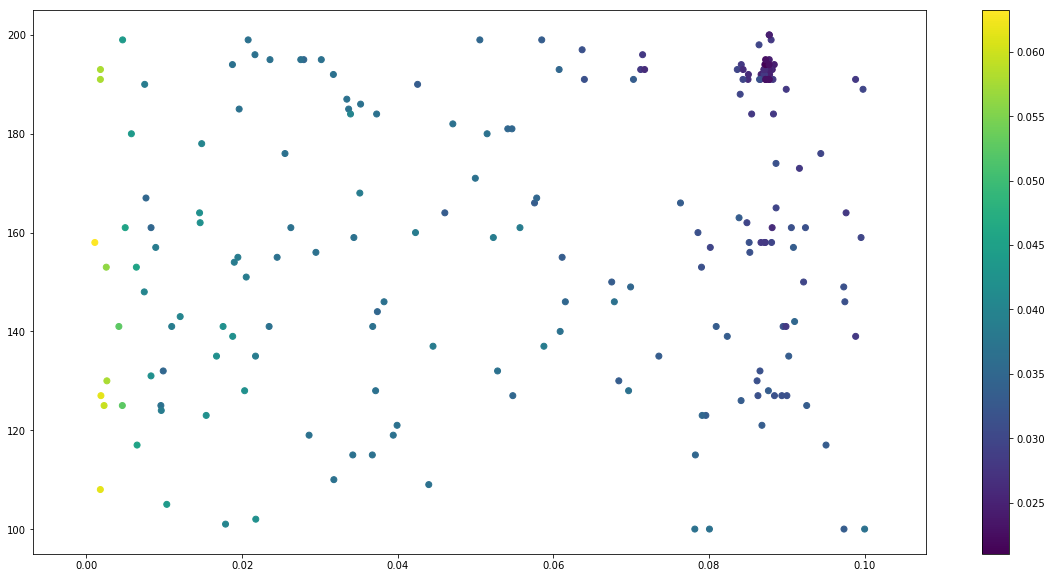

In [36]:
param_1 = []
param_2 = []
costs = []

for k,v in smac.runhistory.config_ids.items():
    param_1.append(k._values['learning_rate'])
    param_2.append(k._values['n_estimators'])
    costs.append(smac.runhistory.cost_per_config[v])

print(len(param_1), len(param_2), len(costs))

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

plt.figure(figsize=(20,10))
sc = plt.scatter(param_1, param_2, c=costs)

plt.colorbar(sc)

plt.show()